In [6]:
import nfl_utils as nfl

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import requests
from bs4 import BeautifulSoup as soup
import random
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

In [8]:
def start(year=2021):
    #load a year
    data = nfl.load_data(2021)
    # load a game
    g1 = get_game_data(data, game_id='random')
    g1.head()
    return data, g1

In [9]:
#load data for a season and for a random game
data, g1 = start()
data.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,NaN,NaN,NaN,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652


## ===========================
## 2023-09-17 Sun

In [105]:
# load a game
g1 = get_game_data(data, game_id='random')
g1.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
8959,1,2021_04_CAR_DAL,2021100303,DAL,CAR,REG,4,NaN,NaN,NaN,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8960,42,2021_04_CAR_DAL,2021100303,DAL,CAR,REG,4,DAL,home,CAR,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8961,57,2021_04_CAR_DAL,2021100303,DAL,CAR,REG,4,DAL,home,CAR,...,1,1,-0.482550,NaN,NaN,NaN,NaN,NaN,0.524593,-52.459282
8962,90,2021_04_CAR_DAL,2021100303,DAL,CAR,REG,4,DAL,home,CAR,...,0,1,-0.418445,NaN,NaN,NaN,NaN,NaN,0.689213,-68.921280
8963,111,2021_04_CAR_DAL,2021100303,DAL,CAR,REG,4,DAL,home,CAR,...,0,1,-1.604990,1.899534,7.407003,5.0,0.49693,0.49693,0.982469,1.753092


In [233]:
# df = data['receiver_player_name' 'lateral_receiver_player_name', 'receiving_yards', 'lateral_receiving_yards']
df = data[['receiver_player_name', 'receiving_yards']]
g = df.groupby('receiver_player_name')[['receiving_yards']].agg({'receiving_yards': ['sum', 'count']})
g
#sort by descending yards
# g = g.sort_values(by='receiving_yards', ascending=False)
# g.reset_index()
# g.columns

receiving_yards      
                                 sum count
receiver_player_name                      
A.Abdullah                     289.0    38
A.Armah                          1.0     1
A.Auclair                       47.0     5
A.Brown                       1556.0   110
A.Collins                       87.0     9
...                              ...   ...
Z.Gentry                       200.0    23
Z.Jones                        607.0    52
Z.Moss                         197.0    23
Z.Pascal                       384.0    38
Z.Wilson                         0.0     0

[521 rows x 2 columns]

In [234]:
g.columns = ["_".join(a) for a in g.columns.to_flat_index()]
g.columns

Index(['receiving_yards_sum', 'receiving_yards_count'], dtype='object')

In [239]:
g = g[g.receiving_yards_count>0]
g['yard per catch'] = g.receiving_yards_sum / g.receiving_yards_count
g['yard per catch'] = g['yard per catch'].round(0)

In [243]:
g = g.rename(columns={'receiving_yards_sum': 'receiving_yards',
                      'receiving_yards_count' : 'num_attempts'
                      })
g

,receiving_yards,num_attempts,yard per catch
receiver_player_name,,,
A.Abdullah,289.0,38,8.0
A.Armah,1.0,1,1.0
A.Auclair,47.0,5,9.0
A.Brown,1556.0,110,14.0
A.Collins,87.0,9,10.0
...,...,...,...
Z.Ertz,784.0,77,10.0
Z.Gentry,200.0,23,9.0
Z.Jones,607.0,52,12.0


In [246]:
g = g.sort_values(by='receiving_yards', ascending=False)
g

,receiving_yards,num_attempts,yard per catch
receiver_player_name,,,
C.Kupp,2425.0,178,14.0
J.Chase,1823.0,106,17.0
D.Adams,1643.0,132,12.0
J.Jefferson,1639.0,112,15.0
D.Johnson,1598.0,167,10.0
...,...,...,...
D.Helm,-1.0,1,-1.0
M.Remmers,-2.0,1,-2.0
T.Heinicke,-2.0,1,-2.0


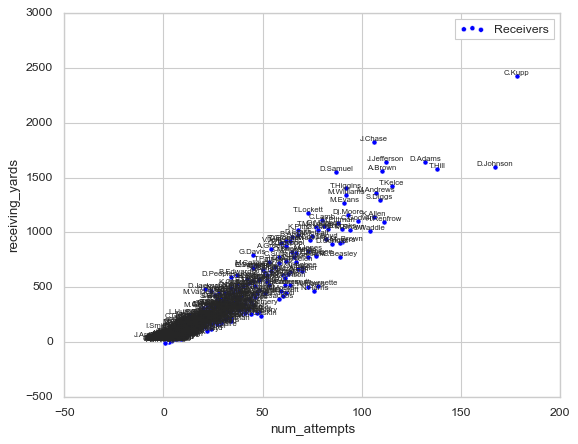

In [265]:
sns.scatterplot(data=g,
                x='num_attempts', y='receiving_yards', 
                marker='o', color='blue', label='Receivers')
for i, label in enumerate(g.index):
    plt.text(g.num_attempts[i], g['receiving_yards'][i], label, fontsize=7, ha='center', va='bottom')

In [266]:
percentile_threshold = np.percentile(g['receiving_yards'], 80)
percentile_threshold

471.4000000000002

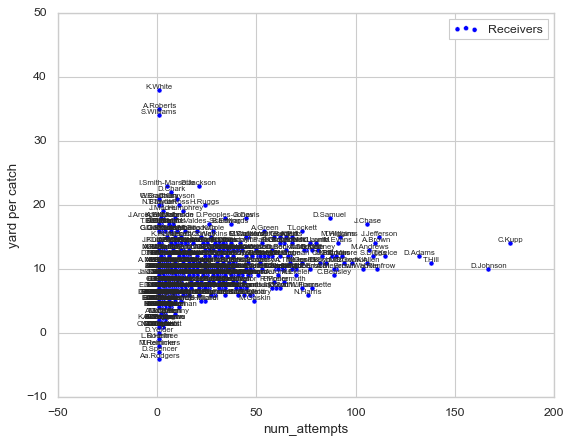

In [264]:
x= g.num_attempts
# y= g['yard per catch']
y = g['receiving_yards']
names = g.index

sns.scatterplot(data=g,
                x='num_attempts', y='yard per catch', 
                marker='o', color='blue', label='Receivers')
for i, label in enumerate(g.index):
    plt.text(g.num_attempts[i], g['yard per catch'][i], label, fontsize=7, ha='center', va='bottom')

In [277]:
list(zip(x, y))[0]
next(zip(x,y))

(178, 2425.0)

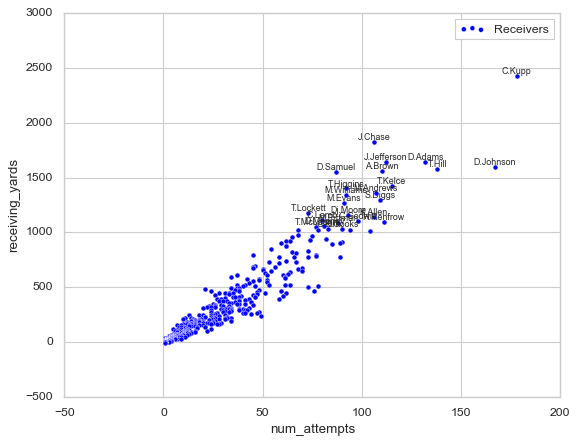

In [276]:
x= g.num_attempts
# y= g['yard per catch']
y = g['receiving_yards']
names = g.index

percentile_threshold = np.percentile(y, 95)

sns.scatterplot(data=g,
                x=x, y=y, 
                marker='o', color='blue', label='Receivers')

# # Annotate points with labels if they are above the 95th percentile threshold
for i, (xi, yi, name) in enumerate(zip(x, y, names)):
    if yi >= percentile_threshold:
        plt.text(xi, yi, name, fontsize=8, ha='center', va='bottom')


<Axes: xlabel='yard per catch', ylabel='Count'>

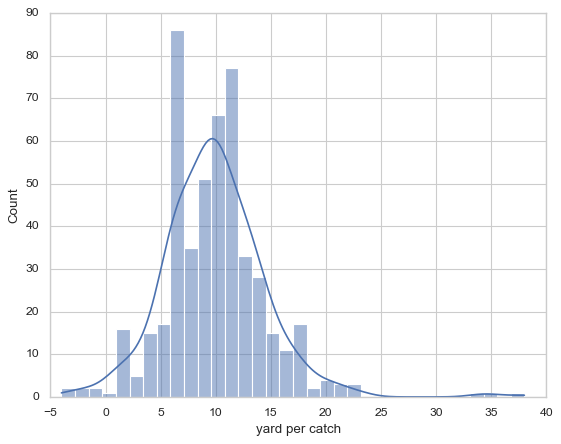

In [259]:
plt.clf()
sns.histplot(data=g, x="receiving_yards", kde=True,
             binrange=(-10, 2600),
             )
plt.xlim(-10, 2600)



In [ ]:
plt.clf()
sns.histplot(data=g, x='yard per catch', kde=True,
            #  binrange=(-10, 2600),
             )
# plt.xlim(-10, 2600)


In [232]:
# g.columns.get_level_values(0)
g.columns = [' '.join(col).strip() for col in df.columns.values]
g.columns 

Index(['r e c e i v e r _ p l a y e r _ n a m e', 'r e c e i v i n g _ y a r d s'], dtype='object')

In [128]:
#find all receivers
mask = g1.receiver.dropna()
# g1[g1.receiver.dropna()]
g1[g1['receiver'].notna()]
df = g1[g1['receiving_yards'].notna()]
#also lateral_receiving_yards, see nflfastr
(df.receiver != df.receiver_player_name).sum() #= all match
(g1.receiver != g1.receiver_player_name).sum() #115




115

In [148]:
r1 = df1.loc[8959][cols]
r1.receiver != r1.receiver_player_name
r1.receiver_player_name
type(r1.receiver_player_name)


float

In [158]:
mask.sum()

0

In [175]:
g1[['receiver', 'receiver_player_name']].notna().any(axis=1)
mask = (g1['receiver'].notna() & g1['receiver_player_name'].isna()) | (g1['receiver'].isna() & g1['receiver_player_name'].notna())

g1[g1[['receiver', 'receiver_player_name']].notna().any(axis=1)][cols]
g1.play_type[mask] #these are all no_play type
g1[mask][cols] #these are all no_play type
data.receiver.dropna() #20089
data.receiver_player_name.dropna() #20089
 

3          D.Henry
4         C.Rogers
6        D.Hopkins
8        C.Edmonds
9          A.Green
           ...    
50701       C.Kupp
50704      J.Chase
50705       T.Boyd
50706      J.Chase
50709     S.Perine
Name: receiver_player_name, Length: 19077, dtype: object

In [197]:
mask = (data['receiver'].notna() & data['receiver_player_name'].isna()) | (data['receiver'].isna() & data['receiver_player_name'].notna())
df = data[mask] #varray(['no_play', 'run', 'pass'], dtype=object)
# df[df.play_type=='run']
df[['receiver_player_name', 'receiving_yards']].dropna()

,receiver_player_name,receiving_yards


In [136]:
mask = g1.receiver != g1.receiver_player_name
mask = g1[['receiver', 'receiver_player_name']].isna().all(axis=1)
# df1 = g1[(g1.receiver != g1.receiver_player_name)]
df1.play_type.unique()
#array([nan, 'kickoff', 'run', 'punt', 'pass', 'no_play', 'extra_point',
    #    'field_goal', 'qb_kneel'], dtype=object)
cols = ['receiver', 'receiver_player_name', 'receiving_yards', 'lateral_receiving_yards']
df1[df1.play_type=='run'][cols]
df1[mask][cols]

C:\Users\Chill\AppData\Local\Temp\ipykernel_988\148297746.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[mask][cols]


,receiver,receiver_player_name,receiving_yards,lateral_receiving_yards
8959,NaN,NaN,NaN,NaN
8960,NaN,NaN,NaN,NaN
8961,NaN,NaN,NaN,NaN
8962,NaN,NaN,NaN,NaN
8964,NaN,NaN,NaN,NaN
...,...,...,...,...
9132,NaN,NaN,NaN,NaN
9133,NaN,NaN,NaN,NaN
9134,NaN,NaN,NaN,NaN
9135,NaN,NaN,NaN,NaN


In [126]:
g1.receiver_player_name
g1.receiver 

8959          NaN
8960          NaN
8961          NaN
8962          NaN
8963    D.Schultz
          ...    
9132          NaN
9133          NaN
9134          NaN
9135          NaN
9136          NaN
Name: receiver, Length: 178, dtype: object

## ===========================
## 2023-09-16

In [11]:
# load a game
g1 = get_game_data(data, game_id='random')
g1.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
46763,1,2021_18_LAC_LV,2022010915,LV,LAC,REG,18,NaN,NaN,NaN,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46764,39,2021_18_LAC_LV,2022010915,LV,LAC,REG,18,LV,home,LAC,...,0,1,0.470969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46765,61,2021_18_LAC_LV,2022010915,LV,LAC,REG,18,LV,home,LAC,...,1,1,0.487810,NaN,NaN,NaN,NaN,NaN,0.449713,-44.971269
46766,82,2021_18_LAC_LV,2022010915,LV,LAC,REG,18,LV,home,LAC,...,1,1,0.429928,1.491029,9.014464,7.0,0.679232,0.679232,0.336222,66.377819
46767,106,2021_18_LAC_LV,2022010915,LV,LAC,REG,18,LV,home,LAC,...,0,1,-0.530329,0.325774,3.721576,2.0,0.983517,0.327852,0.413753,58.624697


In [103]:
'receiver' in g1.columns

True

In [28]:
g1.passer.dropna().unique()
import pandas as pd

# Create a sample DataFrame
data = {'Column1': ['A', 'B', 'A', 'C', 'B', 'C'],
        'Column2': [1, 2, 1, 3, 5, 3]}
df = pd.DataFrame(data)

# Filter for unique combinations of values from 'Column1' and 'Column2'
unique_combinations = df.drop_duplicates(subset=['Column1', 'Column2'])

print(unique_combinations)
# unique_combinations.to_dict()

# Convert the unique combinations to a dictionary of tuples
result_dict = unique_combinations.to_records(index=False).tolist()
result_dict = [tuple(row) for row in result_dict]

print(result_dict)

array(['J.Burrow', 'B.Mayfield', 'B.Allen'], dtype=object)

In [51]:
passers = g1[['posteam', 'name']][g1.passer_id.notna()]
unique_combinations = passers.drop_duplicates(subset=['posteam', 'name'])
print(unique_combinations)
# # Convert the unique combinations to a dictionary of tuples
team_QBs = unique_combinations.to_records(index=False).tolist()
team_QBs = [tuple(row) for row in result_dict]
team_QBs


      posteam        name
22602     CIN    J.Burrow
22628     CLE  B.Mayfield
22753     CIN     B.Allen


[('CIN', 'J.Burrow'), ('CLE', 'B.Mayfield'), ('CIN', 'B.Allen')]

In [65]:
qb

,name,yards_gained
317,P.Mahomes,6171.0
295,M.Stafford,5878.0
366,T.Brady,5804.0
172,J.Allen,5771.0
176,J.Burrow,5362.0
...,...,...
16,A.Lee,0.0
95,D.Amendola,0.0
180,J.Crowder,-1.0
349,S.Diggs,-2.0


In [12]:
def count_QB_passing_yards(data):
    #get all passers
    # passers = g1[['posteam', 'name']][g1.passer_id.notna()]
    passers = data[['name']][data.passer_id.notna()]
    #one row
    # g1.loc[22602]
    passers = passers.name.unique()
    #count how many yards they pass
    g = data.groupby('name')['yards_gained'].sum().reset_index()
    # g[g.name].isin(passers)
    df = g[g.name.isin(passers)]
    return df

In [14]:
df = count_QB_passing_yards(data)
df

,name,yards_gained
4,A.Brown,16.0
6,A.Dalton,1452.0
16,A.Lee,0.0
24,A.Rodgers,4234.0
28,A.Wilson,16.0
...,...,...
387,T.Siemian,1110.0
389,T.Tagovailoa,2631.0
390,T.Taylor,998.0
391,T.Townsend,16.0


In [ ]:
##filter QB passing yards data
#set threshold for minimum passing yards
qb = count_QB_passing_yards(data)
# qb.set_index(qb.columns[0], inplace=True)
qb = qb.sort_values('yards_gained', ascending=False)
threshold = 500
qb = qb[qb['yards_gained'] > threshold]

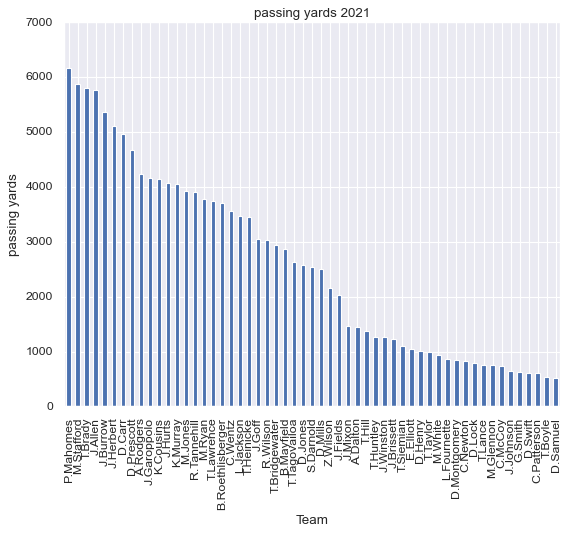

In [13]:

#plot using matplotlib
qb.set_index(qb.columns[0], inplace=True)

df = qb
ax = df.plot(kind='bar')
plt.xlabel('Team')  # Set the x-axis label
plt.ylabel('passing yards')      # Set the y-axis label
plt.title('passing yards 2021')  # Set the plot title
# Hide the legend
ax.get_legend().remove()
plt.show()

In [41]:
# check who passes the ball
col =['passer_id']
# count passing yards
g1[g1.passer_id.notna()]
passers = g1[['posteam', 'name']][g1.passer_id.notna()]
gainers = g1[['name']][g1.passer_id.notna()]
#one row
# g1.loc[22602]
passers = gainers.name.unique()
#count how many yards they pass
g = g1.groupby('name')['yards_gained'].sum().reset_index()
# g[g.name].isin(passers)
g[~g.name.isin(passers)]

,name,yards_gained
2,D.Johnson,16.0
4,J.Chase,0.0
5,J.Landry,0.0
6,J.Mixon,64.0
7,N.Chubb,137.0
8,S.Perine,20.0
9,T.Hill,0.0


In [31]:
# import pandas as pd

# Create a sample DataFrame
data = {'Category': ['A', 'B', 'C', 'A', 'B', 'D'],
        'Value': [10, 20, 15, 5, 25, 30]}
df = pd.DataFrame(data)

# List L1 containing the categories of interest
L1 = ['A', 'B', 'C']

# Group by 'Category' and calculate the sum within each group
grouped = df.groupby('Category')['Value'].sum().reset_index()

# Filter the groups based on values in list L1
result = grouped[grouped['Category'].isin(L1)]

print(result)


  Category  Value
0        A     15
1        B     45
2        C     15


In [16]:
g1['name'].unique()

array([nan, 'J.Mixon', 'J.Burrow', 'S.Perine', 'J.Chase', 'N.Chubb',
       'B.Mayfield', 'J.Landry', 'D.Johnson', 'B.Allen', 'T.Hill'],
      dtype=object)

In [ ]:
# how many passing yards a QB & his team has over aseaon
total_passing_yards = {}
# (teamA, QB1):200
# for each game
#calculate total passing yards of all passers
# add results to main dict

#convert dict to list, sort by yards in descending order


## =======================================
### 2023-09-15

In [10]:
# unique game ids in data
def unique_game_id(data):
    game_ids = data.game_id.unique()
    return game_ids

# games = unique_game_id(data)
# games

def select_game(data, method='random'):
    game_ids = unique_game_id(data)
    return random.choice(game_ids)

gid1 = select_game(data, 'random')

def get_game_data(data, game_id='random'):
    if game_id == 'random':
        game_id = select_game(data, 'random')
    game_data = data[data['game_id']==game_id].sort_values(by='play_id')
    return game_data

g1 = get_game_data(data, 'random')
g1.head()


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
12573,1,2021_05_IND_BAL,2021101100,BAL,IND,REG,5,NaN,NaN,NaN,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12574,40,2021_05_IND_BAL,2021101100,BAL,IND,REG,5,BAL,home,IND,...,0,1,-0.336774,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12575,62,2021_05_IND_BAL,2021101100,BAL,IND,REG,5,BAL,home,IND,...,0,1,0.169881,1.485705,10.606366,9.0,0.617926,0.245527,0.486119,51.388076
12576,86,2021_05_IND_BAL,2021101100,BAL,IND,REG,5,BAL,home,IND,...,0,1,-0.862582,NaN,NaN,NaN,NaN,NaN,0.544061,45.593870
12577,114,2021_05_IND_BAL,2021101100,BAL,IND,REG,5,BAL,home,IND,...,0,1,-1.443973,0.223274,4.230483,2.0,0.985117,0.985117,0.972851,2.714878


In [38]:
data

[{'category': 'A', 'value': 10},
 {'category': 'B', 'value': 20},
 {'category': 'A', 'value': 30},
 {'category': 'B', 'value': 40},
 {'category': 'C', 'value': 50}]

In [51]:
team_yards = {team:0 for team in data.home_team.values}
team_yards
# len(list(teams.keys()))
# teams = list(teams.keys())
team_yards

{'TEN': 0,
 'LV': 0,
 'LA': 0,
 'KC': 0,
 'TB': 0,
 'NYG': 0,
 'NO': 0,
 'HOU': 0,
 'WAS': 0,
 'NE': 0,
 'CIN': 0,
 'CAR': 0,
 'ATL': 0,
 'BUF': 0,
 'IND': 0,
 'DET': 0,
 'MIA': 0,
 'CHI': 0,
 'LAC': 0,
 'JAX': 0,
 'GB': 0,
 'CLE': 0,
 'BAL': 0,
 'PIT': 0,
 'ARI': 0,
 'NYJ': 0,
 'PHI': 0,
 'SEA': 0,
 'SF': 0,
 'DEN': 0,
 'DAL': 0,
 'MIN': 0}

In [41]:
# g1.groupby(['posteam', 'posteam_type'])['yards_gained'].sum()

ls = []
games = unique_game_id(data)
for game_id in games:
    #filter game data
    g = get_game_data(data, game_id)
    #create a dict that sums all yards gained per team
    dct = g.groupby(['posteam'])['yards_gained'].sum().to_dict()
    #add to a list
    ls.append(dct)

ls


[{'ARI': 416.0, 'TEN': 248.0},
 {'BAL': 406.0, 'LV': 491.0},
 {'CHI': 322.0, 'LA': 386.0},
 {'CLE': 459.0, 'KC': 397.0},
 {'DAL': 451.0, 'TB': 431.0},
 {'DEN': 420.0, 'NYG': 314.0},
 {'GB': 229.0, 'NO': 322.0},
 {'HOU': 449.0, 'JAX': 395.0},
 {'LAC': 424.0, 'WAS': 259.0},
 {'MIA': 259.0, 'NE': 393.0},
 {'CIN': 366.0, 'MIN': 403.0},
 {'CAR': 381.0, 'NYJ': 254.0},
 {'ATL': 260.0, 'PHI': 436.0},
 {'BUF': 371.0, 'PIT': 252.0},
 {'IND': 336.0, 'SEA': 381.0},
 {'DET': 434.0, 'SF': 442.0},
 {'ATL': 350.0, 'TB': 341.0},
 {'BUF': 314.0, 'MIA': 216.0},
 {'CHI': 206.0, 'CIN': 248.0},
 {'DAL': 419.0, 'LAC': 410.0},
 {'DEN': 398.0, 'JAX': 189.0},
 {'DET': 344.0, 'GB': 323.0},
 {'CLE': 355.0, 'HOU': 302.0},
 {'BAL': 481.0, 'KC': 405.0},
 {'IND': 356.0, 'LA': 371.0},
 {'LV': 425.0, 'PIT': 331.0},
 {'ARI': 474.0, 'MIN': 419.0},
 {'NE': 260.0, 'NYJ': 336.0},
 {'CAR': 383.0, 'NO': 128.0},
 {'NYG': 391.0, 'WAS': 407.0},
 {'PHI': 330.0, 'SF': 306.0},
 {'SEA': 397.0, 'TEN': 532.0},
 {'ARI': 407.0, 'JAX': 3

In [52]:
# Initialize an empty dictionary to store the result
team_yards = {team:0 for team in data.home_team.values}


# Iterate through the keys in the dictionaries
for dict_ in ls:
    for key in dict_.keys():
        # Check if the key exists in both dictionaries
        if key in dict_ and key in team_yards:
            # Add the values for the current key from both dictionaries
            team_yards[key] += dict_[key]
team_yards

{'TEN': 6179.0,
 'LV': 6569.0,
 'LA': 7841.0,
 'KC': 8155.0,
 'TB': 7611.0,
 'NYG': 4892.0,
 'NO': 5177.0,
 'HOU': 4731.0,
 'WAS': 5506.0,
 'NE': 6319.0,
 'CIN': 7466.0,
 'CAR': 5087.0,
 'ATL': 5166.0,
 'BUF': 7405.0,
 'IND': 5905.0,
 'DET': 5494.0,
 'MIA': 5223.0,
 'CHI': 5231.0,
 'LAC': 6648.0,
 'JAX': 5195.0,
 'GB': 6480.0,
 'CLE': 5797.0,
 'BAL': 6444.0,
 'PIT': 5622.0,
 'ARI': 6537.0,
 'NYJ': 5216.0,
 'PHI': 6470.0,
 'SEA': 5508.0,
 'SF': 7226.0,
 'DEN': 5620.0,
 'DAL': 7238.0,
 'MIN': 6170.0}

In [57]:
team_yards

{'TEN': 6179.0,
 'LV': 6569.0,
 'LA': 7841.0,
 'KC': 8155.0,
 'TB': 7611.0,
 'NYG': 4892.0,
 'NO': 5177.0,
 'HOU': 4731.0,
 'WAS': 5506.0,
 'NE': 6319.0,
 'CIN': 7466.0,
 'CAR': 5087.0,
 'ATL': 5166.0,
 'BUF': 7405.0,
 'IND': 5905.0,
 'DET': 5494.0,
 'MIA': 5223.0,
 'CHI': 5231.0,
 'LAC': 6648.0,
 'JAX': 5195.0,
 'GB': 6480.0,
 'CLE': 5797.0,
 'BAL': 6444.0,
 'PIT': 5622.0,
 'ARI': 6537.0,
 'NYJ': 5216.0,
 'PHI': 6470.0,
 'SEA': 5508.0,
 'SF': 7226.0,
 'DEN': 5620.0,
 'DAL': 7238.0,
 'MIN': 6170.0}

In [63]:
list(team_yards.items())

[('TEN', 6179.0),
 ('LV', 6569.0),
 ('LA', 7841.0),
 ('KC', 8155.0),
 ('TB', 7611.0),
 ('NYG', 4892.0),
 ('NO', 5177.0),
 ('HOU', 4731.0),
 ('WAS', 5506.0),
 ('NE', 6319.0),
 ('CIN', 7466.0),
 ('CAR', 5087.0),
 ('ATL', 5166.0),
 ('BUF', 7405.0),
 ('IND', 5905.0),
 ('DET', 5494.0),
 ('MIA', 5223.0),
 ('CHI', 5231.0),
 ('LAC', 6648.0),
 ('JAX', 5195.0),
 ('GB', 6480.0),
 ('CLE', 5797.0),
 ('BAL', 6444.0),
 ('PIT', 5622.0),
 ('ARI', 6537.0),
 ('NYJ', 5216.0),
 ('PHI', 6470.0),
 ('SEA', 5508.0),
 ('SF', 7226.0),
 ('DEN', 5620.0),
 ('DAL', 7238.0),
 ('MIN', 6170.0)]

In [81]:
df.set_index(df.columns[0], inplace=True)
df


,1
0,
ARI,6537.0
ATL,5166.0
BAL,6444.0
BUF,7405.0
CAR,5087.0
CHI,5231.0
CIN,7466.0
CLE,5797.0
DAL,7238.0


In [80]:
df.columns

RangeIndex(start=0, stop=2, step=1)

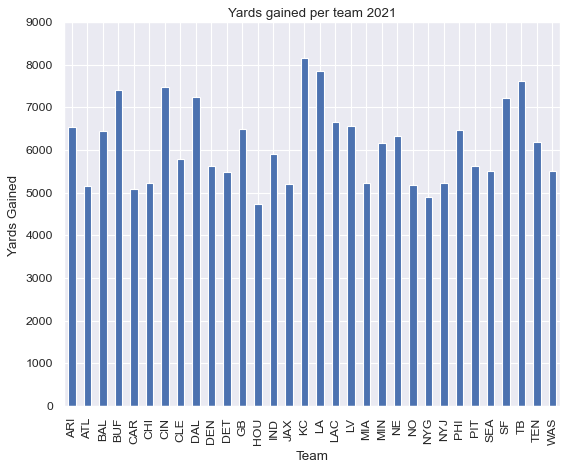

In [83]:
t = sorted(list(list(team_yards.items())), key=lambda x:x[0])
df = pd.DataFrame.from_dict(t)
df.set_index(df.columns[0], inplace=True)
ax = df.plot(kind='bar')
plt.xlabel('Team')  # Set the x-axis label
plt.ylabel('Yards Gained')      # Set the y-axis label
plt.title('Yards gained per team 2021')  # Set the plot title
# Hide the legend
ax.get_legend().remove()
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

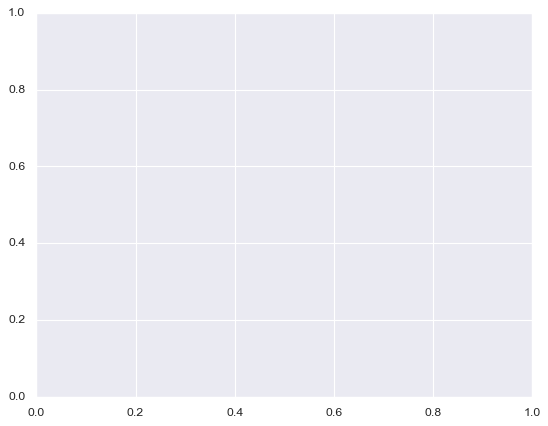

In [66]:
plt.plot(t)

In [29]:
416+248

664

In [14]:
#yards gained per home team, away team
#total yards gained per game

g = data.groupby('game_id')['yards_gained'].sum()
g

game_id
2021_01_ARI_TEN    664.0
2021_01_BAL_LV     897.0
2021_01_CHI_LA     708.0
2021_01_CLE_KC     856.0
2021_01_DAL_TB     882.0
                   ...  
2021_20_LA_TB      787.0
2021_20_SF_GB      475.0
2021_21_CIN_KC     736.0
2021_21_SF_LA      678.0
2021_22_LA_CIN     618.0
Name: yards_gained, Length: 285, dtype: float64

In [ ]:
# for each team, show yards gained each game, sorted by week

###### =======================

In [30]:
import pandas as pd

# Sample data as a list of dictionaries
data = [
    {"category": "A", "value": 10},
    {"category": "B", "value": 20},
    {"category": "A", "value": 30},
    {"category": "B", "value": 40},
    {"category": "C", "value": 50},
]

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Group the DataFrame by "category" and calculate the sum of "value" for each group
category_sums = df.groupby("category")["value"].sum().to_dict()

# Print the result
print(category_sums)


{'A': 40, 'B': 60, 'C': 50}


In [17]:
qb = count_QB_passing_yards(data)
qb = qb.sort_values('yards_gained', ascending=False)
threshold = 500
qb = qb[qb['yards_gained'] > threshold]
qb

,name,yards_gained
317,P.Mahomes,6171.0
295,M.Stafford,5878.0
366,T.Brady,5804.0
172,J.Allen,5771.0
176,J.Burrow,5362.0
196,J.Herbert,5112.0
99,D.Carr,4973.0
130,D.Prescott,4683.0
24,A.Rodgers,4234.0
188,J.Garoppolo,4173.0


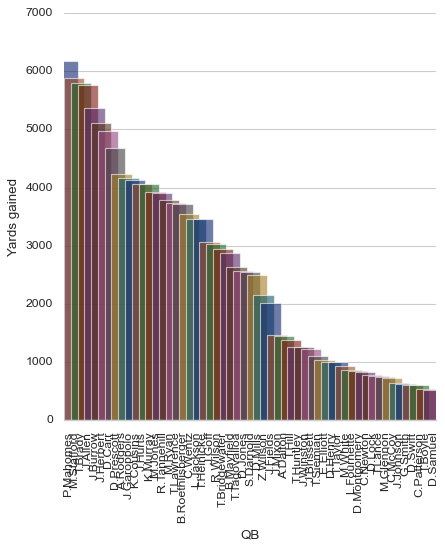

In [35]:
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
# g = sns.barplot(
    data=qb, kind="bar",
    x="name", y="yards_gained",
    errorbar="sd", palette="dark", alpha=.6, height=6, width=3,
    dodge=True
)
g.despine(left=True)
g.set_axis_labels("QB", "Yards gained")
g.set_xticklabels(ax.get_xticklabels(), rotation=90)

# g.legend.set_title("")

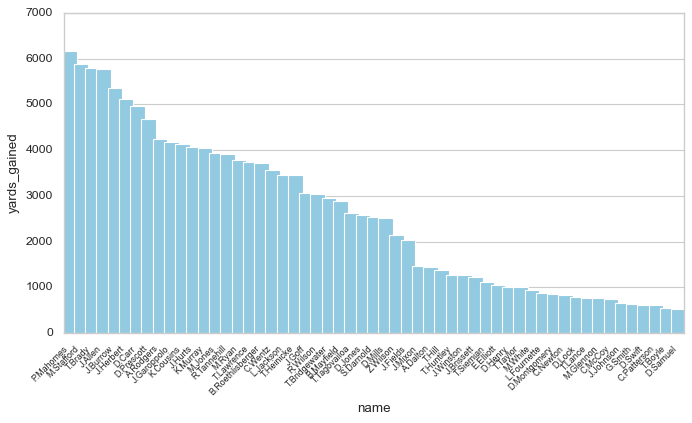

In [82]:
# VERTICAL BAR PLOT

import seaborn as sns
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))
# Draw a nested barplot by species and sex
# g = sns.catplot(
bar_color = "skyblue"
g = sns.barplot(x="name", y="yards_gained", data=qb, 
                 errorbar=None, 
                #  palette="Blues", 
                 saturation=0.8, 
                 color='skyblue',
                 width=1.3,
                 dodge=True)

# g.despine(left=True)
# g.set_axis_labels("QB", "Yards gained")
g.set_xticklabels(g.get_xticklabels(), 
                  rotation=45,
                  horizontalalignment="right", 
                #   fontweight='light',
                #   fontsize='x-large',
                  fontsize=8,
                );


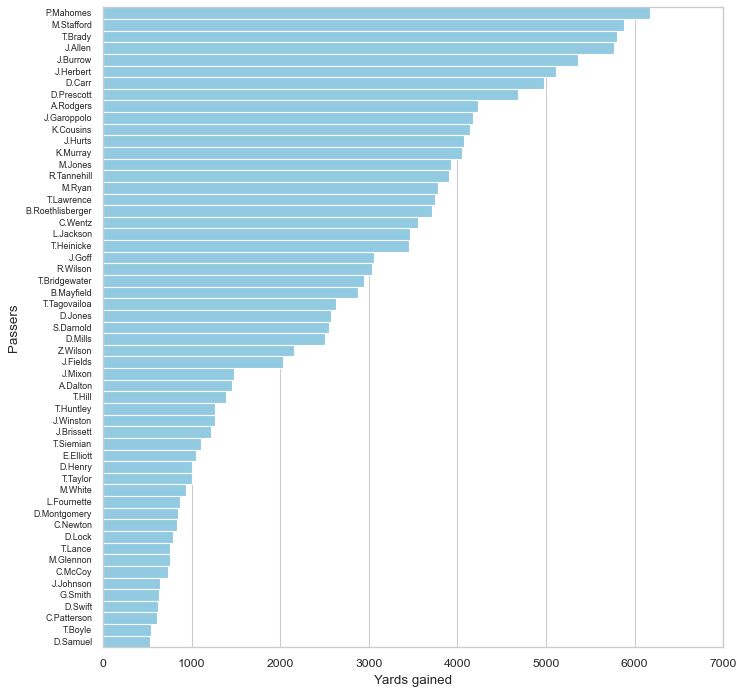

In [102]:
# HORIZONTAL BAR PLOT

import seaborn as sns
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 10))
# Draw a nested barplot by species and sex
# g = sns.catplot(
bar_color = "skyblue"
ax = sns.barplot(data=qb, 
                y="name", x="yards_gained", 
                errorbar=None, 
                #  palette="Blues", 
                 saturation=0.8, 
                 color='skyblue',
                 width=1,
                 dodge=True)
ax.set(xlabel='Yards gained', ylabel='Passers')

# g.despine(left=True)
# g.set_axis_labels("QB", "Yards gained")
ax.set_yticklabels(ax.get_yticklabels(), 
                #   rotation=45,
                #   horizontalalignment="right", 
                #   fontweight='light',
                #   fontsize='x-large',
                  fontsize=8,
                );
